[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/moshi4/pyCirclize/blob/main/docs/radar_chart.ipynb)

In [1]:
# !pip install pycirclize

## 1. Radar Chart

pyCirclize can plot a **Radar Chart**([wiki](https://en.wikipedia.org/wiki/Radar_chart)) from table dataframe.

### 1-1. Example1

         HP  ATK  DEF  SP.ATK  SP.DEF  SPD
Hero     80   80   80      80      80   80
Warrior  90   95   95      30      30   80
Wizard   60   20   20     100      90   50


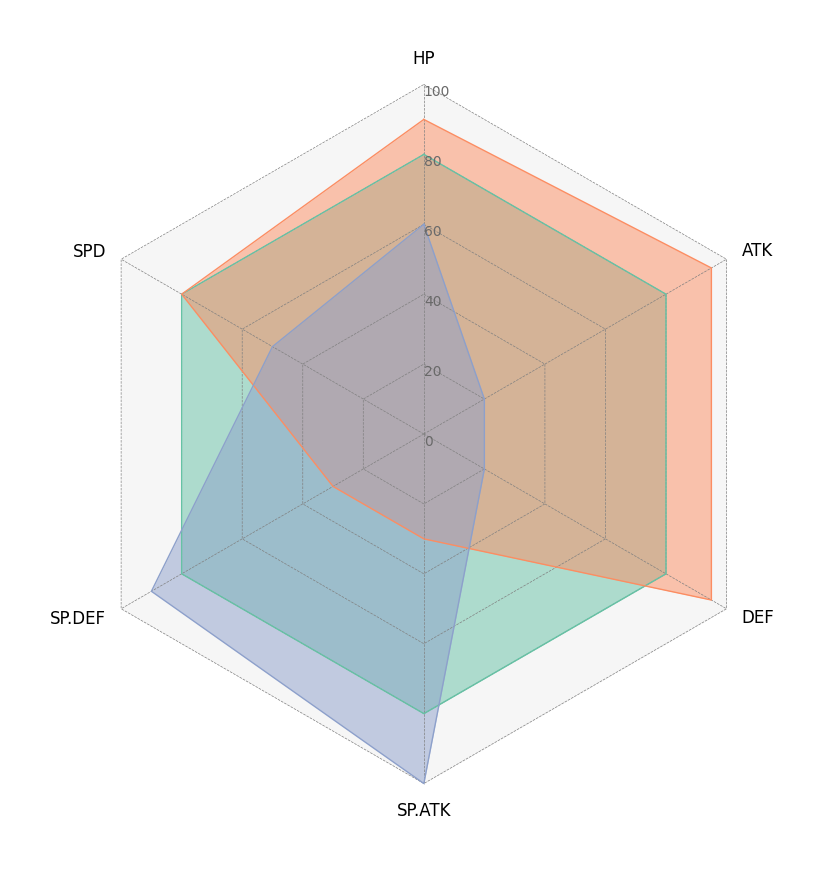

In [2]:
from pycirclize import Circos
import pandas as pd

# Create RPG jobs parameter dataframe (3 jobs, 6 parameters)
df = pd.DataFrame(
    data=[
        [80, 80, 80, 80, 80, 80],
        [90, 95, 95, 30, 30, 80],
        [60, 20, 20, 100, 90, 50],
    ],
    index=["Hero", "Warrior", "Wizard"],
    columns=["HP", "ATK", "DEF", "SP.ATK", "SP.DEF", "SPD"],
)
print(df)

# Initialize Circos instance for radar chart plot
circos = Circos.radar_chart(
    df,
    vmax=100,
    grid_interval_ratio=0.2,
)

# Plot figure
fig = circos.plotfig()

### 1-2. Example2

         HP  MP  ATK  DEF  SP.ATK  SP.DEF  SPD
Hero     80  80   80   80      80      80   80
Warrior  90  20   95   95      30      30   80
Wizard   60  90   20   20     100      90   50


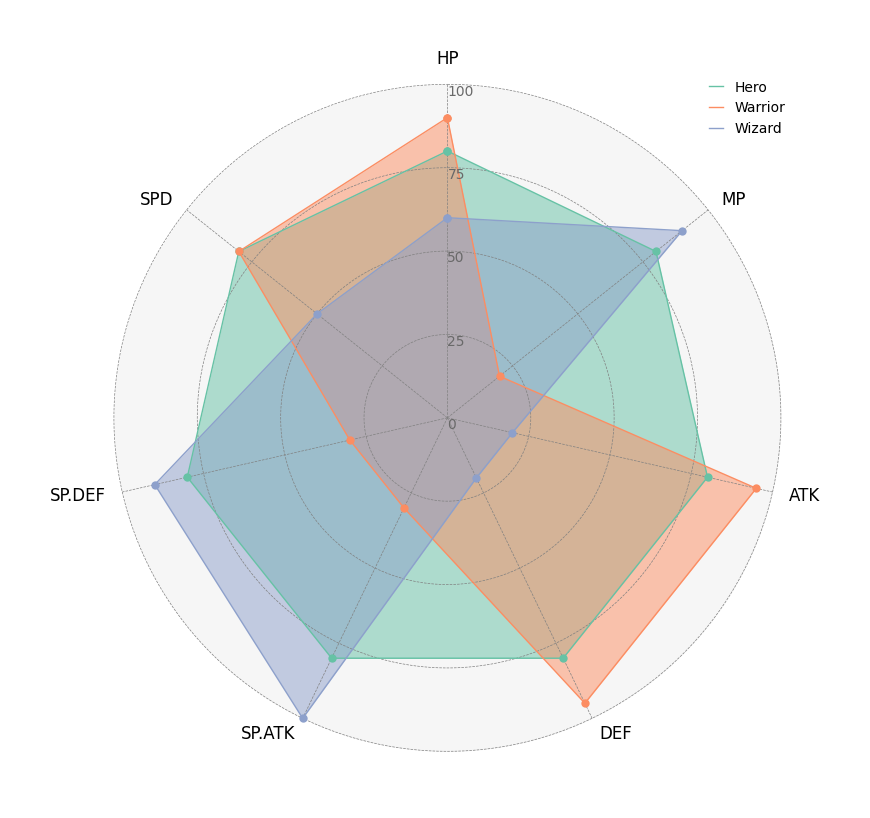

In [3]:
from pycirclize import Circos
import pandas as pd

# Create RPG jobs parameter dataframe (3 jobs, 7 parameters)
df = pd.DataFrame(
    data=[
        [80, 80, 80, 80, 80, 80, 80],
        [90, 20, 95, 95, 30, 30, 80],
        [60, 90, 20, 20, 100, 90, 50],
    ],
    index=["Hero", "Warrior", "Wizard"],
    columns=["HP", "MP", "ATK", "DEF", "SP.ATK", "SP.DEF", "SPD"],
)
print(df)

# Initialize Circos instance for radar chart plot
circos = Circos.radar_chart(
    df,
    vmax=100,
    marker_size=6,
    circular=True,
    cmap="Set2",
    grid_interval_ratio=0.25,
)

# Plot figure & set legend on upper right
fig = circos.plotfig()
_ = circos.ax.legend(loc="upper right")

### 1-3. Example3

          HP  MP  ATK  DEF  SP.ATK  SP.DEF  SPD  LUK
Hero      80  80   80   80      80      80   80   80
Warrior   90  20   95   95      30      30   80   70
Wizard    60  90   20   20     100      90   50   70
Assassin  70  50   60   40      60      40  100   60


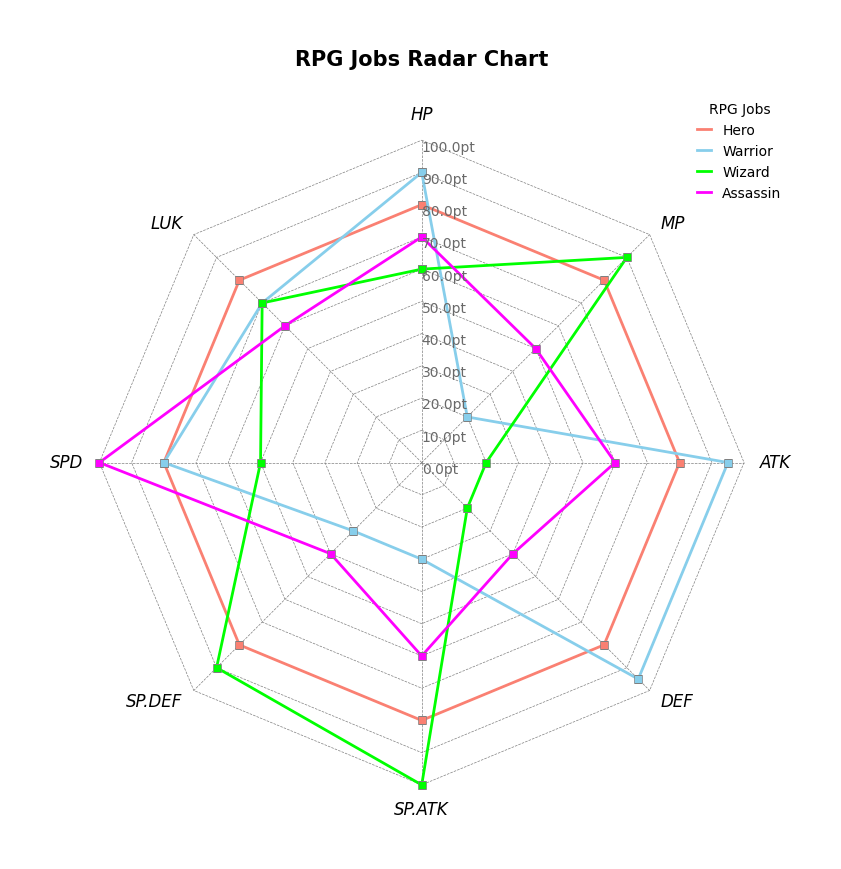

In [4]:
from pycirclize import Circos
import pandas as pd

# Create RPG jobs parameter dataframe (4 jobs, 8 parameters)
df = pd.DataFrame(
    data=[
        [80, 80, 80, 80, 80, 80, 80, 80],
        [90, 20, 95, 95, 30, 30, 80, 70],
        [60, 90, 20, 20, 100, 90, 50, 70],
        [70, 50, 60, 40, 60, 40, 100, 60],
    ],
    index=["Hero", "Warrior", "Wizard", "Assassin"],
    columns=["HP", "MP", "ATK", "DEF", "SP.ATK", "SP.DEF", "SPD", "LUK"],
)
print(df)

# Initialize Circos instance for radar chart plot
circos = Circos.radar_chart(
    df,
    vmax=100,
    fill=False,
    marker_size=6,
    bg_color=None,
    cmap=dict(Hero="salmon", Warrior="skyblue", Wizard="lime", Assassin="magenta"),
    grid_interval_ratio=0.1,
    grid_label_formatter=lambda v: f"{v:.1f}pt",
    label_kws_handler=lambda _: dict(style="italic"),
    line_kws_handler=lambda _: dict(lw=2, ls="solid"),
    marker_kws_handler=lambda _: dict(marker="s", ec="grey", lw=0.5),
)
circos.text("RPG Jobs Radar Chart", r=125, size=15, weight="bold")

# Plot figure & set legend on upper right
fig = circos.plotfig()
_ = circos.ax.legend(
    loc="upper right",
    bbox_to_anchor=(1.05, 1.05),
    fontsize=10,
    title="RPG Jobs",
)

### 1-4. Example4

          HP  MP  ATK  DEF  SP.ATK  SP.DEF  SPD  LUK
Hero      80  80   80   80      80      80   80   80
Warrior   90  20   95   95      30      30   80   70
Wizard    60  90   20   20     100      90   50   70
Assassin  70  50   60   40      60      40  100   60


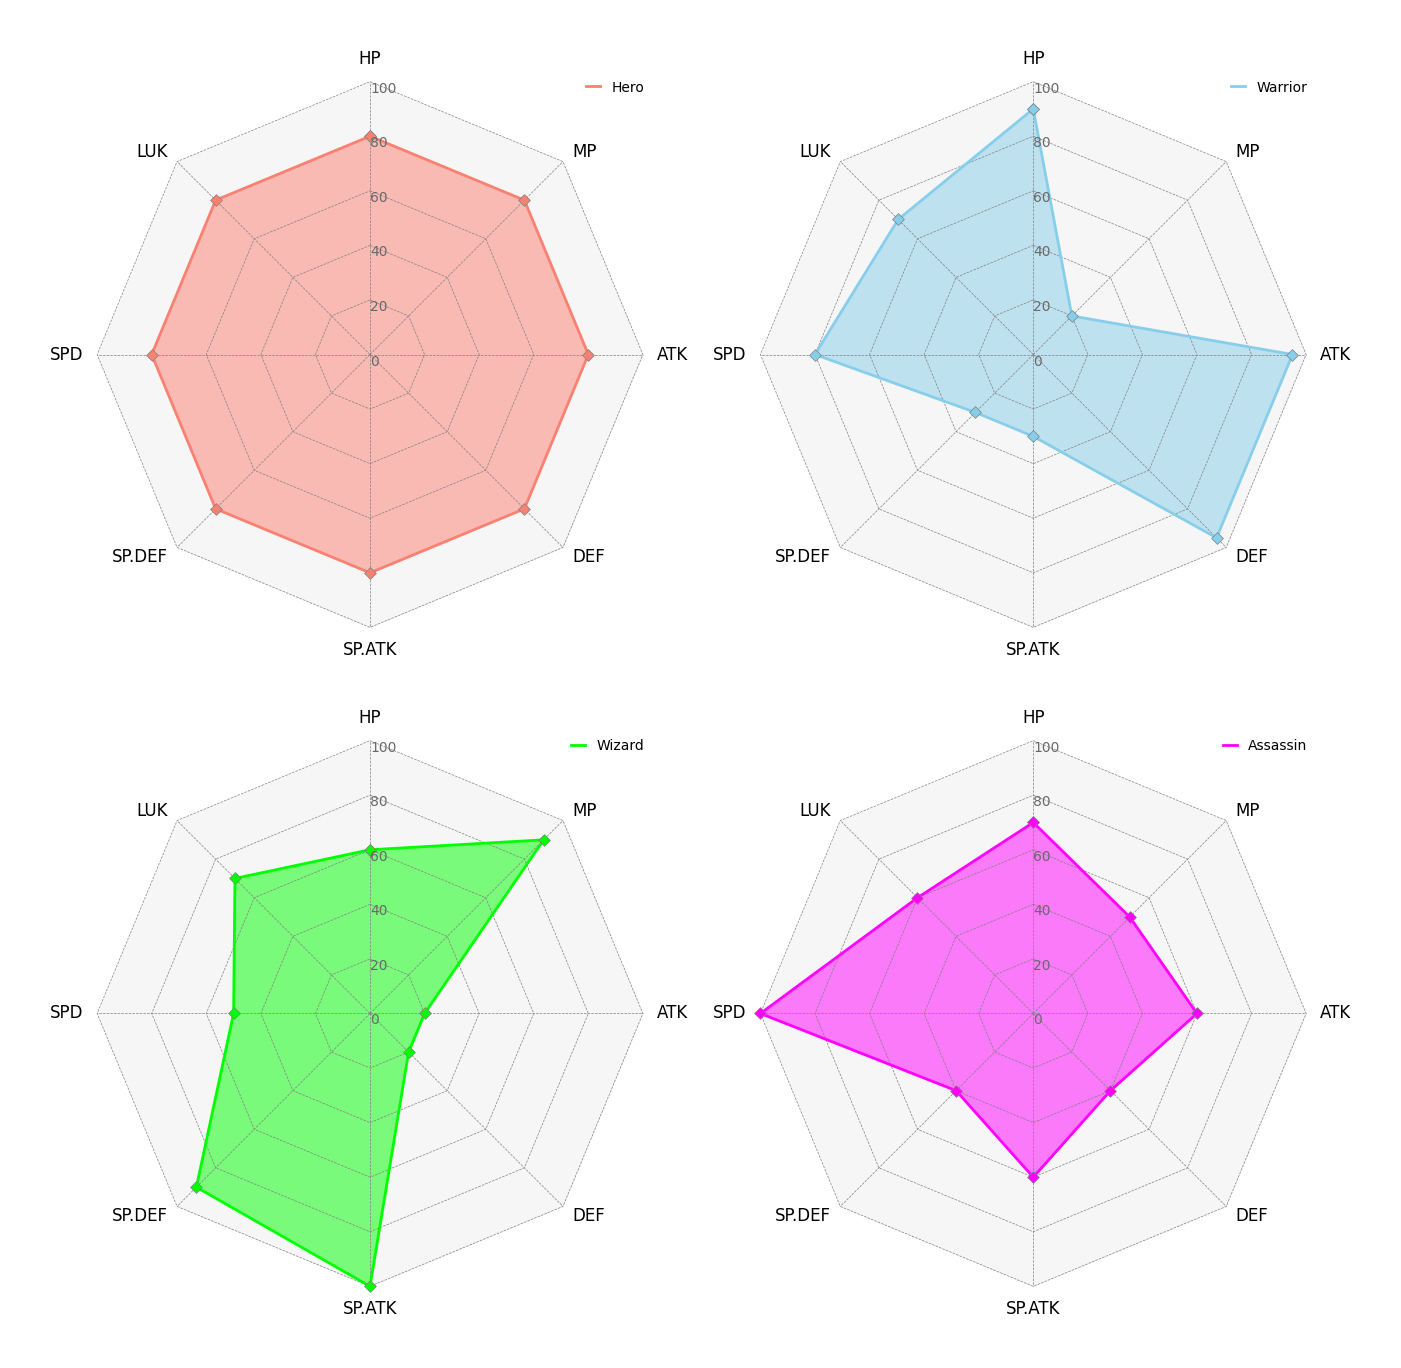

In [6]:
from pycirclize import Circos
import pandas as pd
import matplotlib.pyplot as plt

# Create RPG jobs parameter dataframe (4 jobs, 8 parameters)
df = pd.DataFrame(
    data=[
        [80, 80, 80, 80, 80, 80, 80, 80],
        [90, 20, 95, 95, 30, 30, 80, 70],
        [60, 90, 20, 20, 100, 90, 50, 70],
        [70, 50, 60, 40, 60, 40, 100, 60],
    ],
    index=["Hero", "Warrior", "Wizard", "Assassin"],
    columns=["HP", "MP", "ATK", "DEF", "SP.ATK", "SP.DEF", "SPD", "LUK"],
)
print(df)

# Create 2 x 2 subplots
fig = plt.figure(figsize=(16, 16), dpi=100)
fig.subplots(2, 2, subplot_kw=dict(polar=True))
fig.subplots_adjust(wspace=0.15, hspace=0.15)

# Plot radar chart into subplots for each target
for target_name, ax in zip(df.index, fig.axes):
    target_df = df.loc[[target_name]]

    # Initialize Circos instance for radar chart plot
    circos = Circos.radar_chart(
        target_df,
        vmax=100,
        marker_size=6,
        cmap=dict(Hero="salmon", Warrior="skyblue", Wizard="lime", Assassin="magenta"),
        grid_interval_ratio=0.2,
        line_kws_handler=lambda _: dict(lw=2, ls="solid"),
        marker_kws_handler=lambda _: dict(marker="D", ec="grey", lw=0.5),
    )

    # Plot figure & set legend on upper right
    circos.plotfig(ax=ax)
    circos.ax.legend(loc="upper right", fontsize=10)